# Wine Quality:
<hr style="border:2px solid black">

## Goal: 
- Discover independence of features within data
- Utilizing said features to develop machine learning models that will determine the quality of wine 
- Determine the drivers of quality
- The insights discovered will be used to estimate quality and provide a more robust understanding of the attributes of a the wine and it's associated quality
<hr style="border:2px solid black">

# Imports

In [209]:
# Standard ds imports:
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Statisitics
from scipy import stats

import os
import acquire as a
import wrangle2 as wr

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<hr style="border:2px solid black">

# **Acquire**
Plan --> **Acquire** --> Prepare --> Explore --> Model --> Deliver

In [210]:
df = a.acquire_wine()

<hr style="border:2px solid black">

# **Prepare**

In [211]:
# split into train, validate, test
train, validate, test = wr.splitter(df, stratify='quality')

Dataframe: (6497, 13) 100%
Train: (4157, 13) | ~60%
Validate: (1040, 13) | ~20%
Test: (1300, 13) | ~20%


In [212]:
# Scale
train_scaled_added, validate_scaled_added, test_scaled_added = wr.QuickScale(train, validate, test, linear=True, scaler='Standard', exclude_cols= ['is_red', 'quality'])

In [213]:
# get dataframes with scaled and unscaled 
train, train_scaled, validate, validate_scaled, test, test_scaled = wr.retrieve_dataframes(train_scaled_added, validate_scaled_added, test_scaled_added)

<hr style="border:2px solid black">

# **Explore**
Plan --> Acquire --> Prepare --> **Explore** --> Model --> Deliver

### <u>Univariate Distributions:</u>

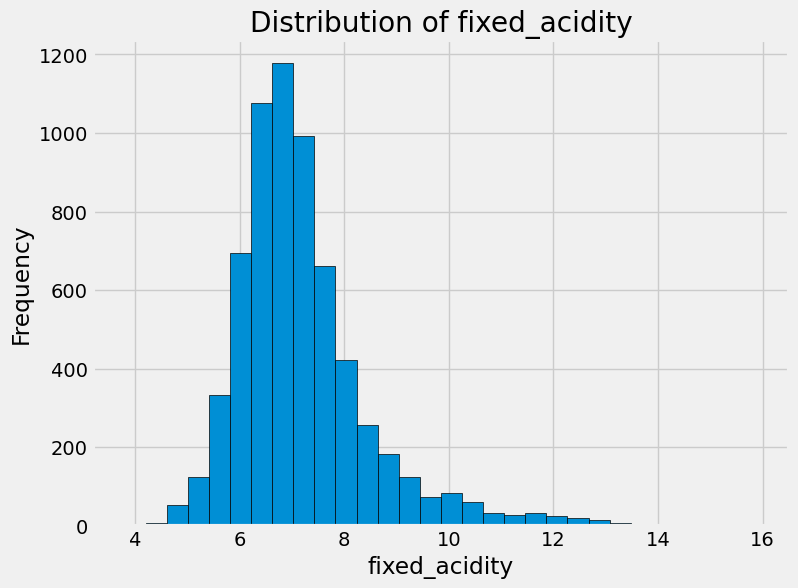

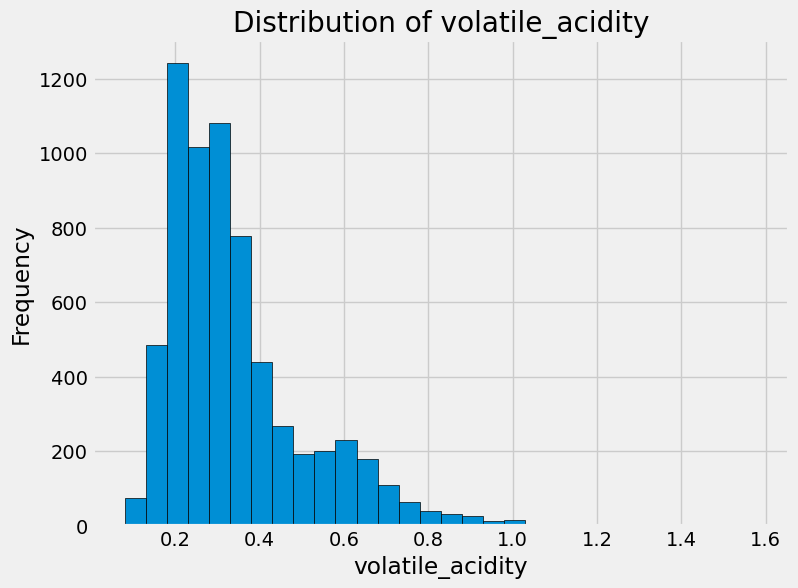

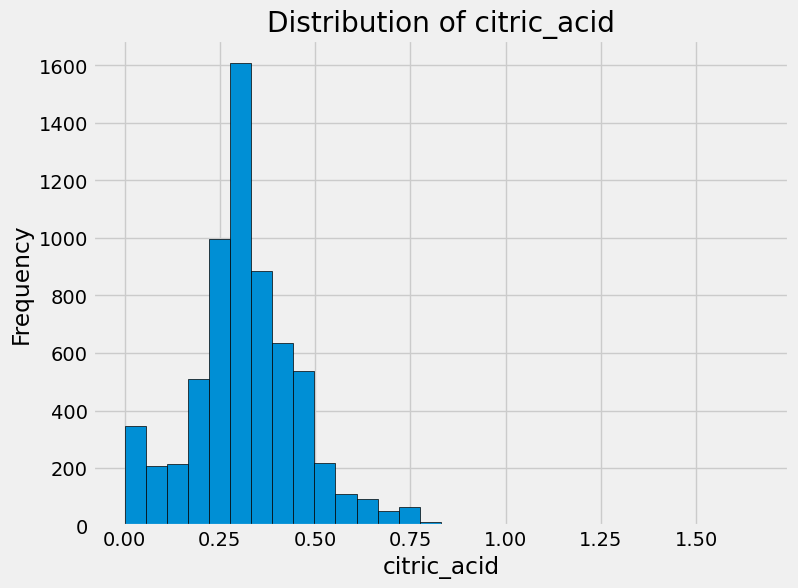

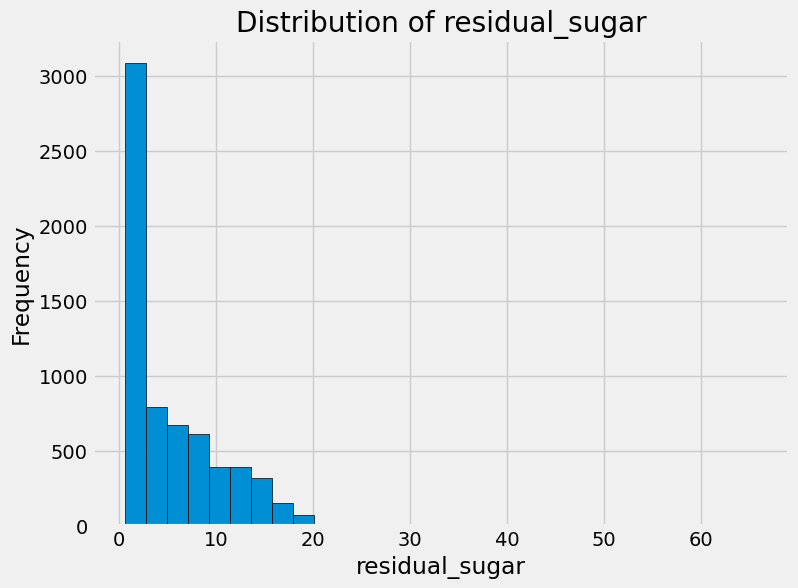

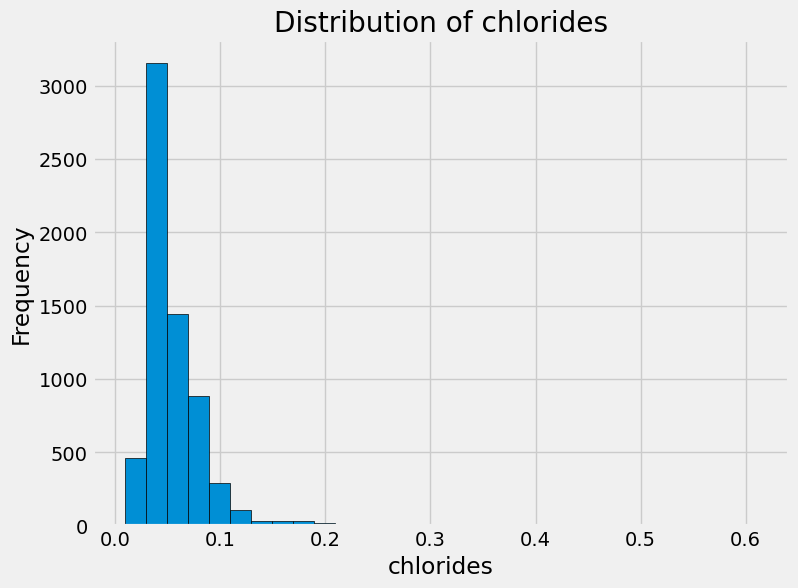

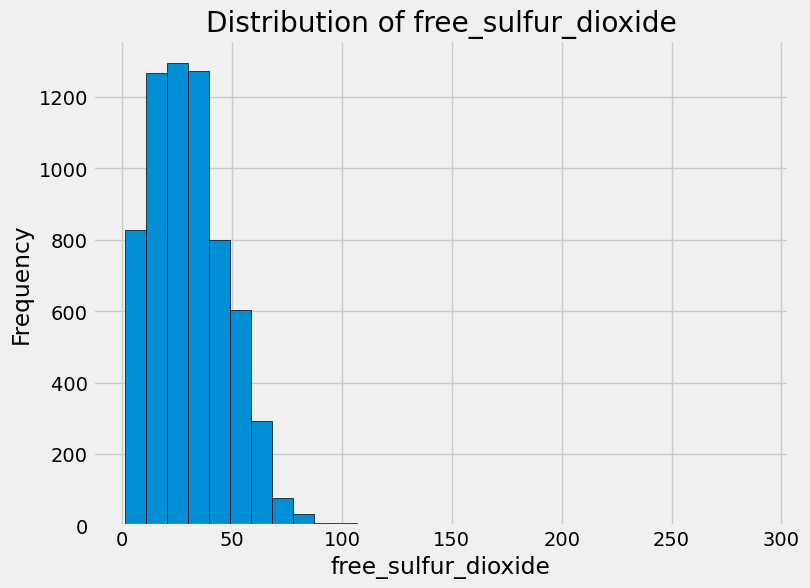

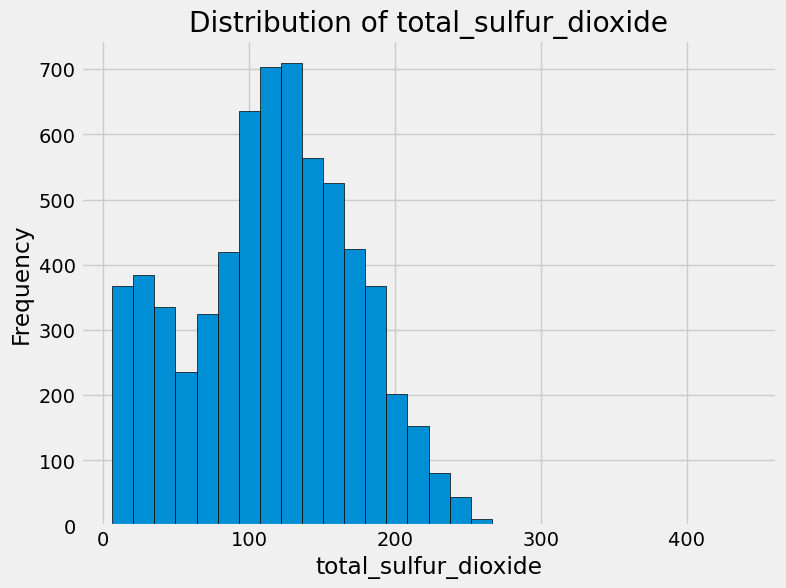

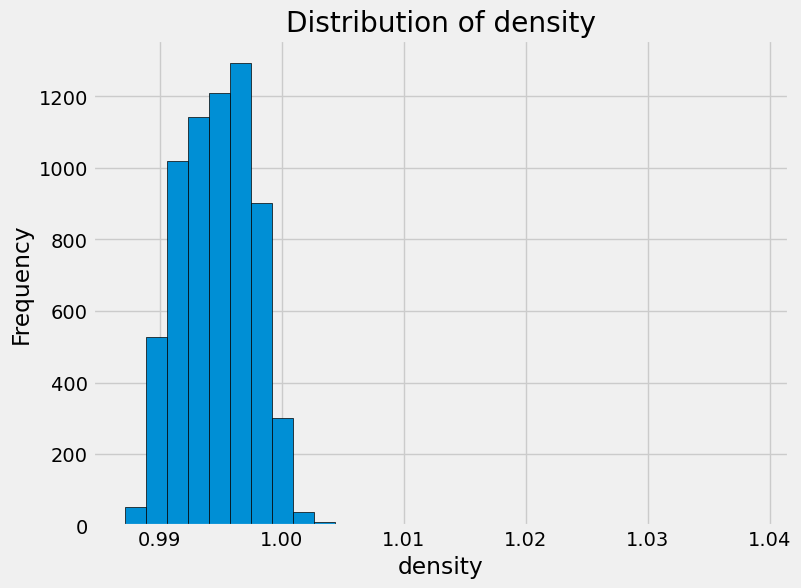

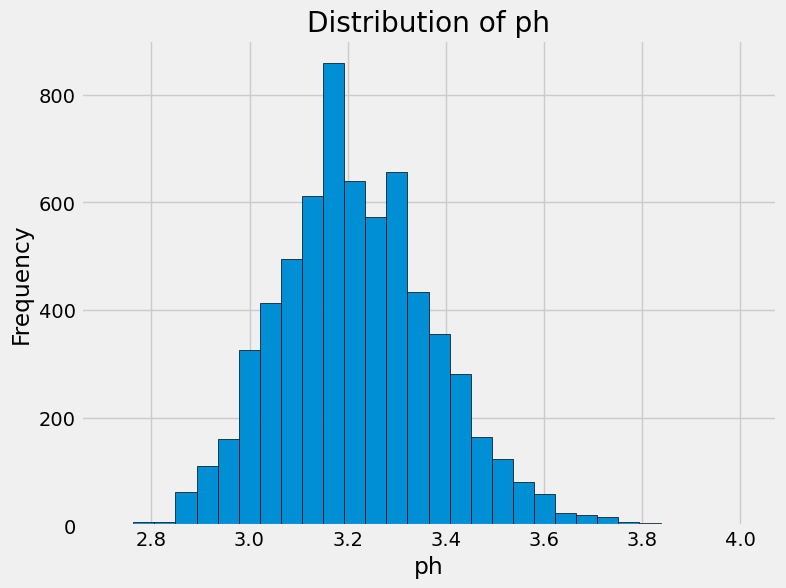

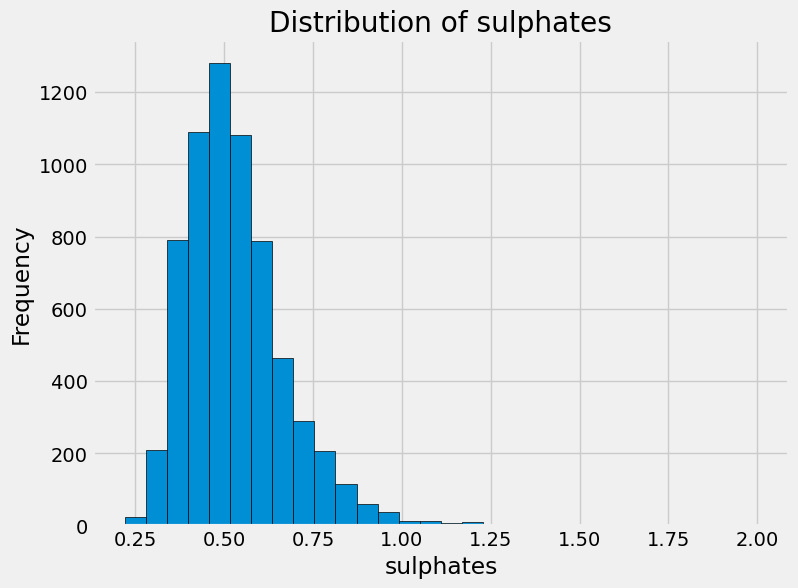

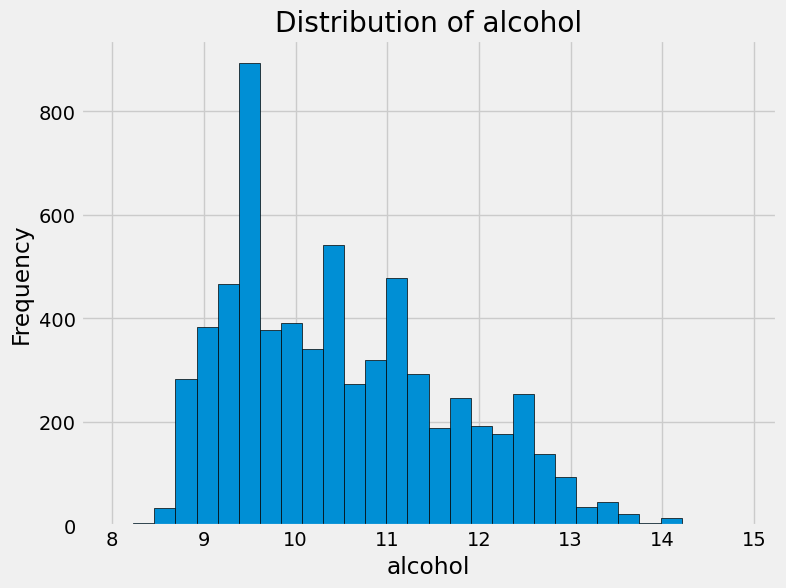

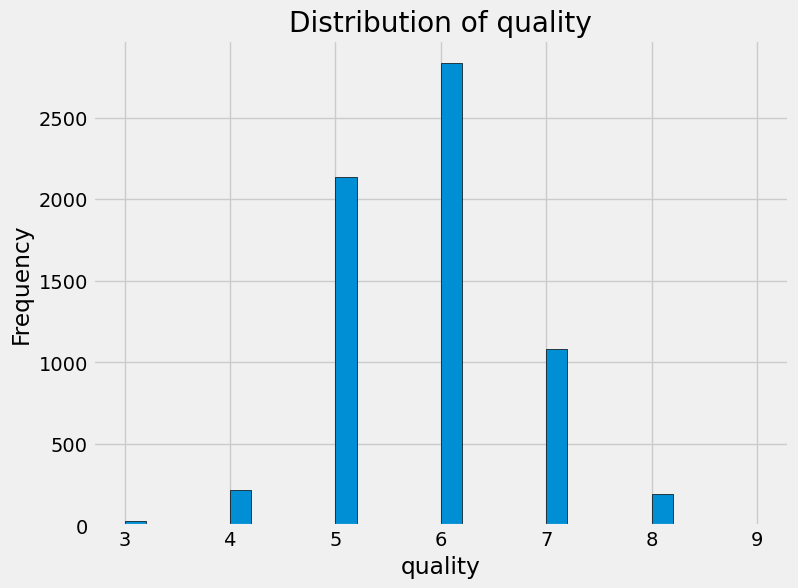

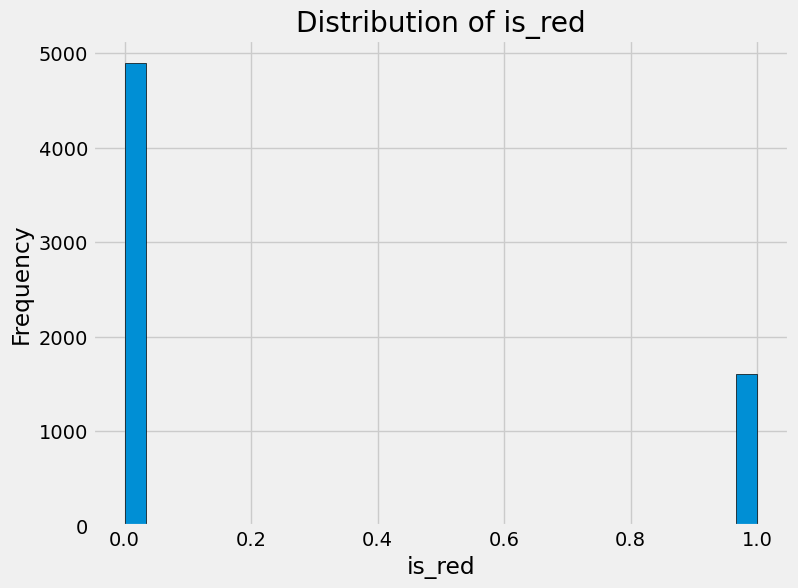

In [214]:
#loop to plot histograms for each column
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

> #### Takeaways:
> Distribution is mostly normal for all but 'residual_sugar' which is skewed to the right and 'is_red' with 75% of observations being white wine.

### <u>Bivariate Analysis:</u>

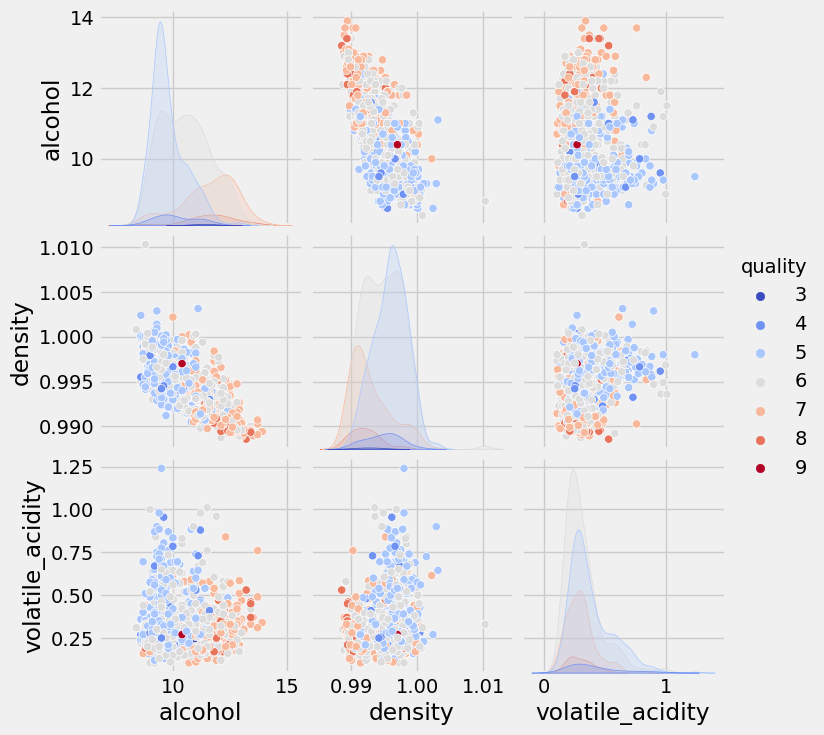

In [215]:
plot_list = ['quality', 'alcohol', 'density', 'volatile_acidity']
sns.pairplot(data=train[plot_list].sample(1000), hue='quality', palette='coolwarm')

### Q1. Is there a relationship between fixed_acidity and quality?


<Axes: xlabel='quality', ylabel='fixed_acidity'>

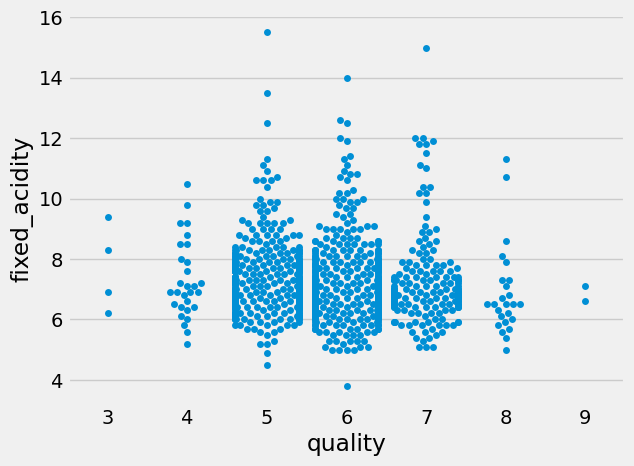

In [216]:
sns.swarmplot(data=train.sample(1000), y='fixed_acidity', x='quality')

<div style="background-color: #A9CCE3; box-shadow: 0 0 0 1px black; padding: 5px;">

**I will now use a Spearman correlation to check for a monotonic relationship betwen fixed_acidity and quality.**

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

**H0: There is no ordinal correlation between fixed_acidity and quality.**<br>
**Ha: There is an ordinal correlation between fixed_acidity and quality.**
</div>

In [217]:
# set alpha
alpha = 0.05

r, p = stats.spearmanr(train.fixed_acidity, train.quality)

if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a relationship between fixed_acidity and quality.')
    print(r, p)
else:
    print('We fail to reject the null hypothesis')
    print(r, p)


We can reject our null hypothesis and suggest that there is a relationship between fixed_acidity and quality.
-0.10158339416874636 5.217750741281213e-11


### Q2. Is there a relationship between chlorides and quality?

<Axes: xlabel='quality', ylabel='chlorides'>

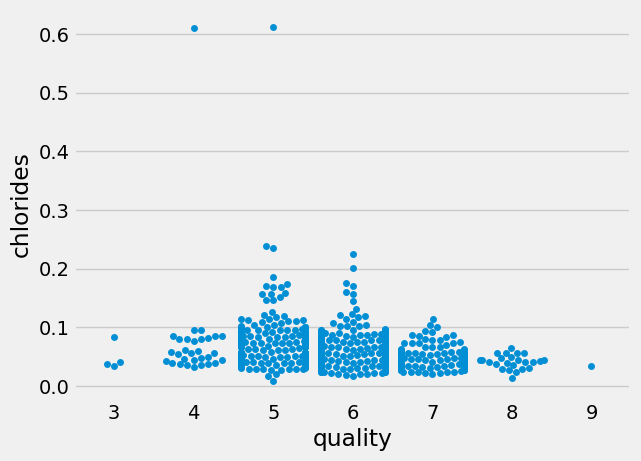

In [218]:
sns.swarmplot(data=train.sample(1000), y='chlorides', x='quality')

<div style="background-color: #A9CCE3; box-shadow: 0 0 0 1px black; padding: 5px;">

**I will now use a Spearman correlation to check for a monotonic relationship betwen chlorides and quality.**

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

**H0: There is no ordinal correlation between chlorides and quality.**<br>
**Ha: There is an ordinal correlation between chlorides and quality.**
</div>

In [219]:
r, p = stats.spearmanr(train.chlorides, train.quality)

if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a relationship between chlorides and quality.')
    print(r, p)
else:
    print('We fail to reject the null hypothesis')
    print(r, p)

We can reject our null hypothesis and suggest that there is a relationship between chlorides and quality.
-0.30451919102860586 6.36435669486711e-90


### Q3. Is there a relationship between residual_sugar and quality?

<Axes: xlabel='quality', ylabel='residual_sugar'>

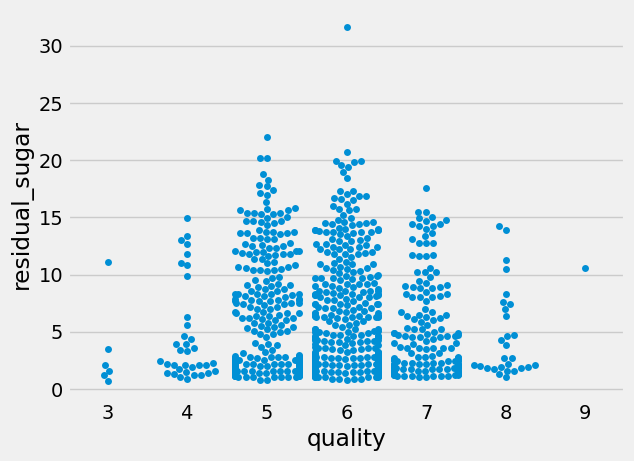

In [220]:
sns.swarmplot(data=train.sample(1000), y='residual_sugar', x='quality')

<div style="background-color: #A9CCE3; box-shadow: 0 0 0 1px black; padding: 5px;">

**I will now use a Spearman correlation to check for a monotonic relationship betwen residual_sugar and quality.**

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

**H0: There is no ordinal correlation between residual_sugar and quality.**<br>
**Ha: There is an ordinal correlation between residual_sugar and quality.**
</div>

In [221]:
r, p = stats.spearmanr(train.residual_sugar, train.quality)

if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a relationship between residual_sugar and quality.')
    print(r, p)
else:
    print('We fail to reject the null hypothesis')
    print(r, p)

We fail to reject the null hypothesis
-0.01704338209411184 0.2719347274575697


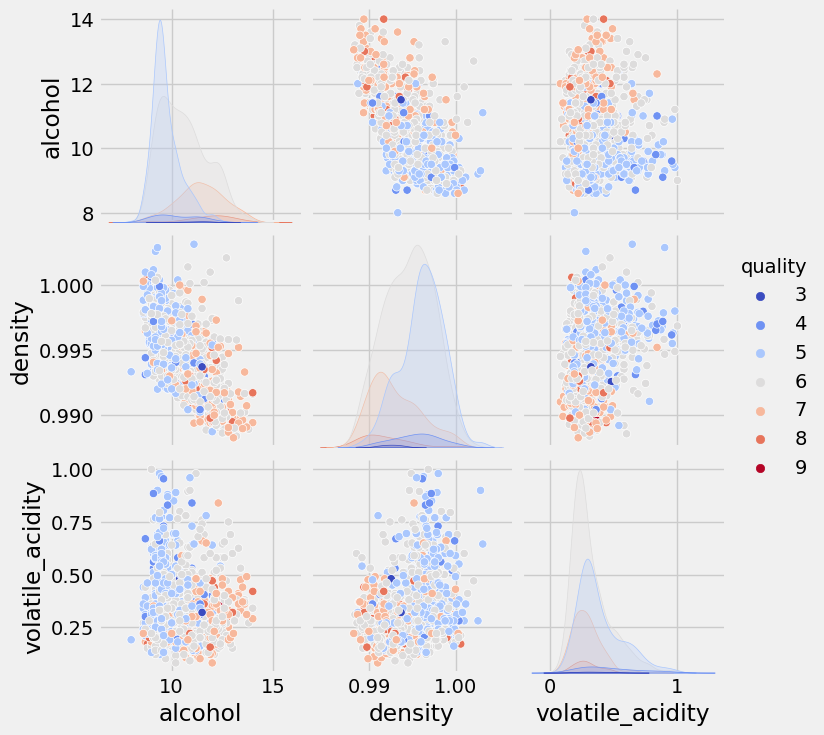

In [222]:
plot_list = ['quality', 'alcohol', 'density', 'volatile_acidity']
sns.pairplot(data=train[plot_list].sample(1000), hue='quality', palette='coolwarm')

### <u>Multivariate Analysis:</u>

<Axes: xlabel='sulphates', ylabel='citric_acid'>

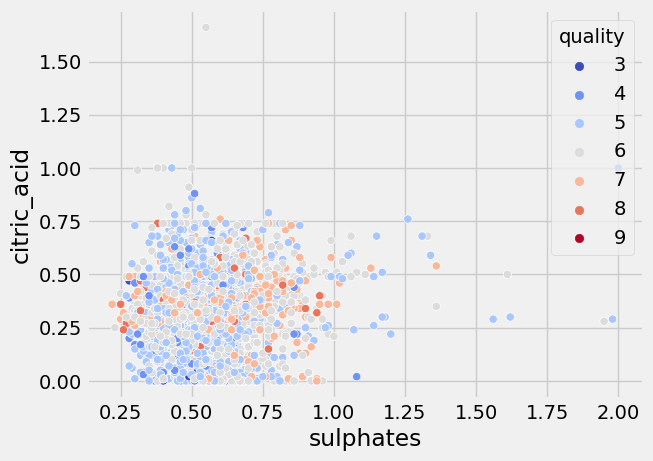

In [223]:
sns.scatterplot(data=train, x='sulphates', y='citric_acid', hue='quality', palette='coolwarm')

> citric_acid: Looks like there is something happening below about 0.25 and above about 0.5. Good candidate for clustering

<Axes: xlabel='sulphates', ylabel='total_sulfur_dioxide'>

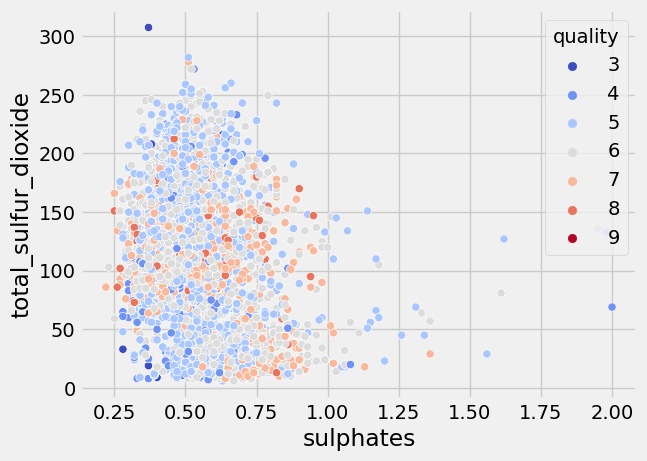

In [224]:
sns.scatterplot(data=train, x='sulphates', y='total_sulfur_dioxide', hue='quality', palette='coolwarm')

> total_sulfur_dioxide: Looks like there is something happening below about 75 and above about 150. Good candidate for clustering.

<Axes: xlabel='sulphates', ylabel='total_sulfur_dioxide'>

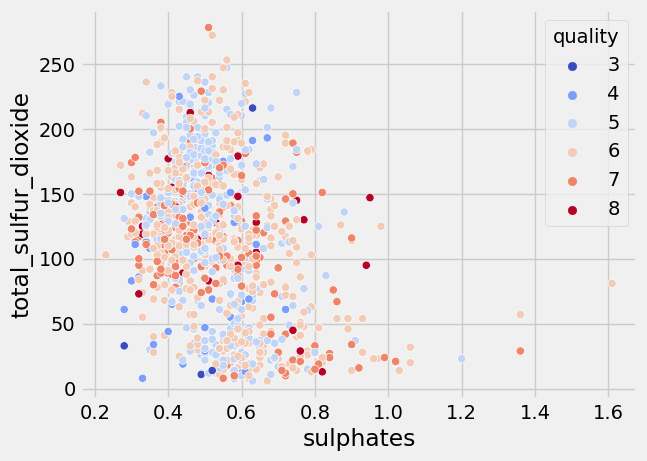

In [225]:
sns.scatterplot(data=train.sample(1000), x='sulphates', y='total_sulfur_dioxide', hue='quality', palette='coolwarm')

> sulphates: Maybe some signal below 0.50?

### <u>Clustering:</u>
> * citric_acid, total_sulfur_dioxide, sulphates

In [226]:
# Cluster Model 1
cluster_features_1 = train_scaled[['volatile_acidity_scaled','chlorides_scaled','alcohol_scaled']]
cluster_features_1_val = validate_scaled[['volatile_acidity_scaled','chlorides_scaled','alcohol_scaled']]
cluster_features_1_test = test_scaled[['volatile_acidity_scaled','chlorides_scaled','alcohol_scaled']]

# Cluster Model 2
cluster_features_2 = train_scaled[['citric_acid_scaled', 'sulphates_scaled', 'total_sulfur_dioxide_scaled', 'chlorides_scaled']]
cluster_features_2_val = validate_scaled[['citric_acid_scaled', 'sulphates_scaled', 'total_sulfur_dioxide_scaled', 'chlorides_scaled']]
cluster_features_2_test = test_scaled[['citric_acid_scaled', 'sulphates_scaled', 'total_sulfur_dioxide_scaled', 'chlorides_scaled']]

# Cluster Model 3
cluster_features_3 = train_scaled[['citric_acid_scaled', 'sulphates_scaled', 'total_sulfur_dioxide_scaled', 'chlorides_scaled', 'ph_scaled']]
cluster_features_3_val = validate_scaled[['citric_acid_scaled', 'sulphates_scaled', 'total_sulfur_dioxide_scaled', 'chlorides_scaled', 'ph_scaled']]
cluster_features_3_test = test_scaled[['citric_acid_scaled', 'sulphates_scaled', 'total_sulfur_dioxide_scaled', 'chlorides_scaled', 'ph_scaled']]

#### KMeans

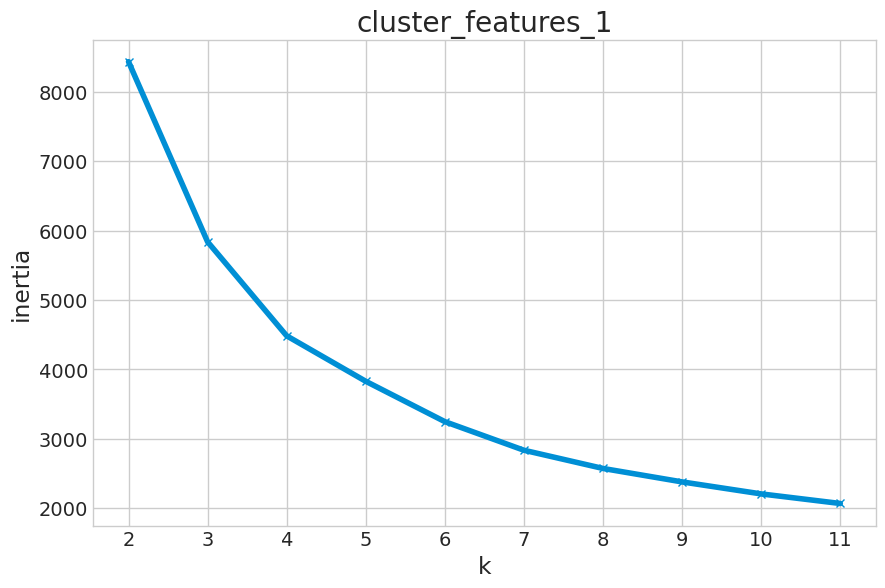

In [227]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(cluster_features_1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.title('cluster_features_1')
    plt.ylabel('inertia')

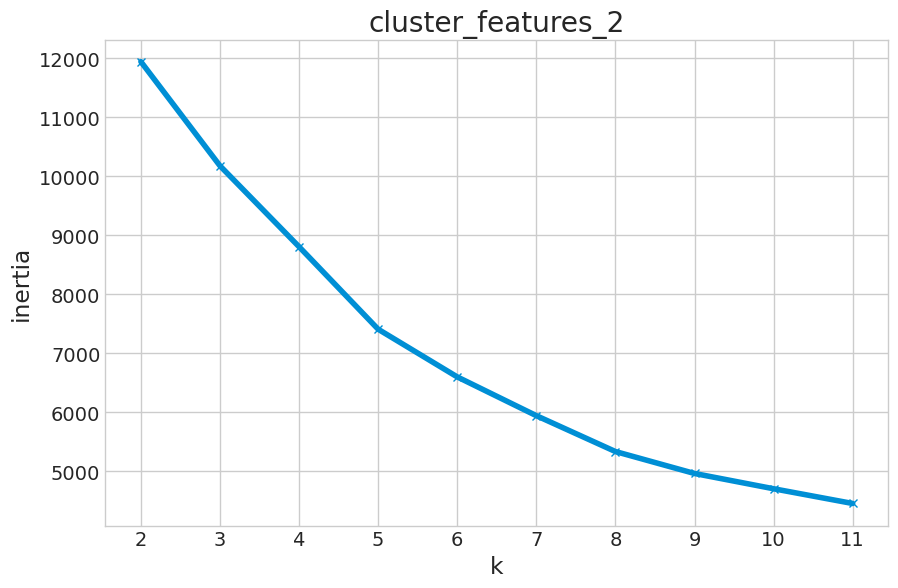

In [228]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(cluster_features_2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.title('cluster_features_2')
    plt.ylabel('inertia')

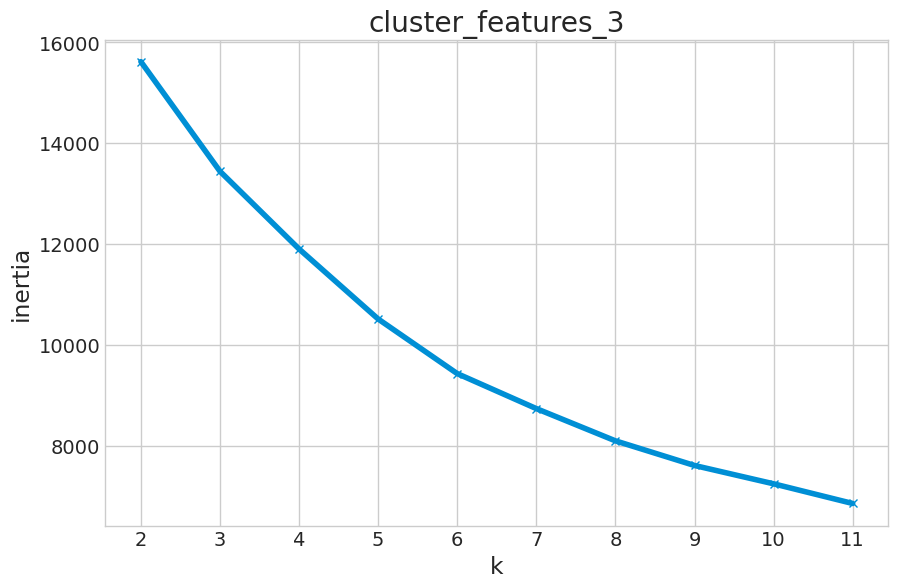

In [229]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(cluster_features_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.title('cluster_features_3')
    plt.ylabel('inertia')

In [230]:
kmeans_1 = KMeans(n_clusters=4)
kmeans_2 = KMeans(n_clusters=5)
kmeans_3 = KMeans(n_clusters=6)

kmeans_1.fit(cluster_features_1)
kmeans_2.fit(cluster_features_2)
kmeans_3.fit(cluster_features_3)

# Predict on train
clusters_1_train = kmeans_1.predict(cluster_features_1)
clusters_2_train = kmeans_2.predict(cluster_features_2)
clusters_3_train = kmeans_3.predict(cluster_features_3)

# Predict on Val
clusters_1_val = kmeans_1.predict(cluster_features_1_val)
clusters_2_val = kmeans_2.predict(cluster_features_2_val)
clusters_3_val = kmeans_3.predict(cluster_features_3_val)

# Predict on Test
clusters_3_test = kmeans_3.predict(cluster_features_3_test)

# Add predictions to dataframes
train_scaled['clusters_1'] = clusters_1_train
train_scaled['clusters_2'] = clusters_2_train
train_scaled['clusters_3'] = clusters_3_train

validate_scaled['clusters_1'] = clusters_1_val
validate_scaled['clusters_2'] = clusters_2_val
validate_scaled['clusters_3'] = clusters_3_val

test_scaled['clusters_3'] = clusters_3_test


### Q4. Is quality significantly different across clusters_3 clusters?

Text(0.5, 1.0, 'Cluster Model 3')

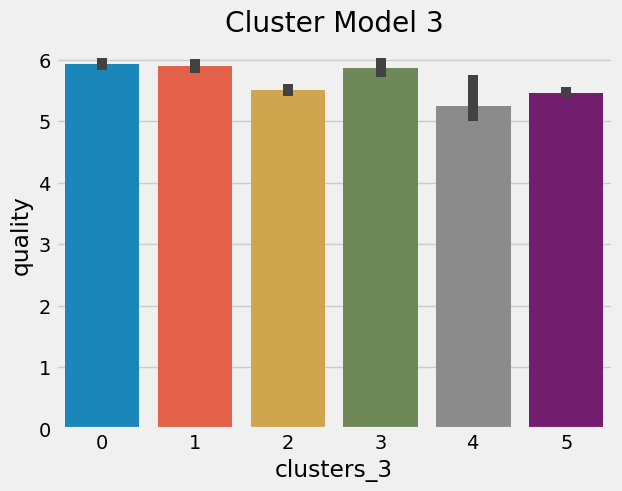

In [231]:
sns.barplot(data=train_scaled.sample(1000), y='quality', x='clusters_3')
plt.title('Cluster Model 3')

<div style="background-color: #A9CCE3; box-shadow: 0 0 0 1px black; padding: 5px;">

**I will now use a Kruskal-Wallis test to see if the mean quality is significantly different across our clusters.**

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

**H0: Quality is the same across all 6 clusters.**<br>
**Ha: Quality is not the same across all 6 clusters.**
</div>

In [232]:
# Create filters of clusters for our Kruskal-Wallis test
cluster_0_quality = train_scaled[train_scaled.clusters_3 == 0].quality
cluster_1_quality = train_scaled[train_scaled.clusters_3 == 1].quality
cluster_2_quality = train_scaled[train_scaled.clusters_3 == 2].quality
cluster_3_quality = train_scaled[train_scaled.clusters_3 == 3].quality
cluster_4_quality = train_scaled[train_scaled.clusters_3 == 4].quality
cluster_5_quality = train_scaled[train_scaled.clusters_3 == 5].quality

In [233]:
# set alpha
alpha = 0.05

f, p = stats.f_oneway(cluster_0_quality, cluster_1_quality, cluster_2_quality, cluster_3_quality, cluster_4_quality, cluster_5_quality)


if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We reject the null hypothesis


<hr style="border:2px solid black">

# **Modeling**
Plan --> Acquire --> Prepare --> Explore --> **Model** --> Deliver

### <u>Baseline:</u>

In [234]:
baseline = (train.quality == 6).sum()/ len(train)
baseline

0.43661294202549916

### <u>Feature Space:</u>

In [235]:
# features

features_1 = ['density_scaled','residual_sugar_scaled','sulphates_scaled','volatile_acidity_scaled','alcohol_scaled','clusters_1']
features_2 = ['fixed_acidity_scaled', 'volatile_acidity_scaled','density_scaled', 'alcohol_scaled', 'clusters_2', 'is_red']
features_3 = ['fixed_acidity_scaled', 'volatile_acidity_scaled','density_scaled', 'alcohol_scaled', 'clusters_3','is_red']

In [236]:
# split into x and y for each distinct feature space

# Train
x_train_scaled = train_scaled.drop(columns=['quality'])
x_train_1 = x_train_scaled[features_1]
x_train_2 = x_train_scaled[features_2]
x_train_3 = x_train_scaled[features_3]
y_train = train.quality.to_frame()

# Validate
x_val_scaled = validate_scaled.drop(columns=['quality'])
x_validate_1 = x_val_scaled[features_1]
x_validate_2 = x_val_scaled[features_2]
x_validate_3 = x_val_scaled[features_3]
y_validate = validate.quality.to_frame()

# Test
x_test_scaled = test_scaled.drop(columns=['quality'])
x_test_3 = x_test_scaled[features_3]
y_test = test.quality.to_frame()

## Decision Tree

In [237]:
scores_all = []

for x in range(1,20):

    clf = DecisionTreeClassifier(max_depth=x, random_state=666)
    clf.fit(x_train_3, y_train)
    
    # evaluate on train
    train_acc = clf.score(x_train_3, y_train)
    
    #evaluate on validate
    val_acc = clf.score(x_validate_3, y_validate)
    
    scores_all.append([x,baseline, train_acc, val_acc])
    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','baseline','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','baseline','train_acc','val_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head(1)

,max_depth,baseline,train_acc,val_acc
7,8,0.436613,0.631706,0.560577


## KNN

In [238]:
# Create knn object with
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(x_train_3, y_train)
# print results
print(f"{19} = n_neighbors on train is           {knn.score(x_train_3, y_train): .2%}")
print(f"{19} = n_neighbors on validate is        {knn.score(x_validate_3, y_validate): .2%}")

19 = n_neighbors on train is            58.60%
19 = n_neighbors on validate is         55.87%


## Logistic Regression

<hr style="border:2px solid black">

# **Evaluation**


In [239]:
# Create knn object with
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(x_train_3, y_train)
# print results
print(f"KNN Model on train is           {knn.score(x_train_3, y_train): .2%}")
print(f"KNN Model on validate is        {knn.score(x_validate_3, y_validate): .2%}")
print(f"KNN Model on test is            {knn.score(x_test_3, y_test): .2%}")

KNN Model on train is            58.60%
KNN Model on validate is         55.87%
KNN Model on test is             54.46%


<hr style="border:2px solid black">

# **Conclusions**
